# Bayesian Belief Network (1,4)
_____________________________________________
* Aayush Malde (1911090)
* Aditya Malwade (1911091)
* Rahul Panchal (1911097)

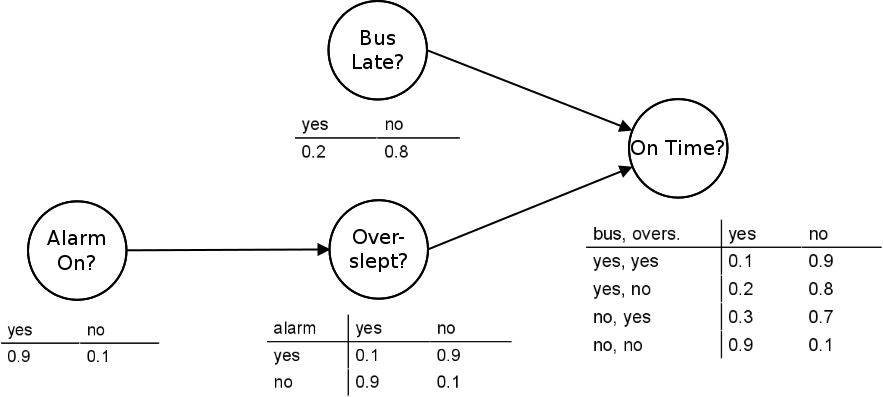

# Defining Network

In [ ]:
nodes = {'BusLate':{'name':'BusLate','start':True,'end':False,'parents':[],'children':['OnTime'],'P':[0.2,0.8]},
         'AlarmOn':{'name':'AlarmOn','start':True,'end':False,'parents':[],'children':['OverSlept'],'P':[0.9,0.1]},
         'OverSlept':{'name':'OverSlept','start':False,'end':False,'parents':['AlarmOn'],'children':['OnTime'],'P':[0.1,0.9]},
         'OnTime':{'name':'OnTime','start':False,'end':True,'parents':['BusLate','OverSlept'],'children':[],'P':[0.9,0.3,0.2,0.1]},
         }

# Computing all Probabilities

In [ ]:
ending_nodes = []
for k in nodes.keys():
  if nodes[k]['end']:
    ending_nodes.append(nodes[k])
ending_nodes

[{'P': [0.9, 0.3, 0.2, 0.1],
  'children': [],
  'end': True,
  'name': 'OnTime',
  'parents': ['BusLate', 'OverSlept'],
  'start': False}]

In [ ]:
def find_all_probs(given, memory, node):
  # checking memory
  if node['name'] in memory.keys():
    print(node['name'], memory[node['name']])
    return memory[node['name']]
  
  # check whether given
  if node['name'] in given.keys():
    if given[node['name']]:
      print(node['name'],(1,0))
      memory[node['name']] = (1,0)
      return (1,0)
    else:
      print(node['name'],(0,1))
      memory[node['name']] = (0,1)
      return (0,1)

  # check start
  if node['start']:
    print(node['name'],node['P'])
    memory[node['name']] = node['P']
    return node['P']
  
  # generating parent combinations for current node to be true
  prob_true = 0
  prob_false = 0
  for i in range(2**len(node['parents'])):
    combination_probability=1
    combination = '0'*int(len(node['parents'])-len(bin(i)[2:]))+bin(i)[2:]
    for pos in range(len(combination)):
      if combination[pos] == '1':
        print(node['parents'][pos],end=", ")
      else:
        print('not '+node['parents'][pos],end=", ")
    print()
    for pos in range(len(combination)):
      if combination[pos] == '1':
        combination_probability = combination_probability*find_all_probs(given, memory, nodes[node['parents'][pos]])[0]
      else:
        combination_probability = combination_probability*find_all_probs(given, memory, nodes[node['parents'][pos]])[1]
    prob_true += combination_probability*node['P'][i]
    prob_false += combination_probability*(1-node['P'][i])
  
  print(node['name'], (prob_true, prob_false))
  memory[node['name']] = (prob_true, prob_false)
  return (prob_true, prob_false)

In [ ]:
given = {'AlarmOn':True}
memory = {}
find_all_probs(given, memory, nodes['OverSlept'])

not AlarmOn, 
AlarmOn (1, 0)
AlarmOn, 
AlarmOn (1, 0)
OverSlept (0.9, 0.09999999999999998)


(0.9, 0.09999999999999998)

In [ ]:
given = {'OnTime': True}
memory = {}
find_all_probs(given, memory, nodes['OverSlept'])

not AlarmOn, 
AlarmOn [0.9, 0.1]
AlarmOn, 
AlarmOn [0.9, 0.1]
OverSlept (0.8200000000000001, 0.18)


(0.8200000000000001, 0.18)

In [ ]:
given = {'BusLate':False}
memory = {}
find_all_probs(given, memory, nodes['OnTime'])

not BusLate, not OverSlept, 
BusLate (0, 1)
not AlarmOn, 
AlarmOn [0.9, 0.1]
AlarmOn, 
AlarmOn [0.9, 0.1]
OverSlept (0.8200000000000001, 0.18)
not BusLate, OverSlept, 
BusLate (0, 1)
OverSlept (0.8200000000000001, 0.18)
BusLate, not OverSlept, 
BusLate (0, 1)
OverSlept (0.8200000000000001, 0.18)
BusLate, OverSlept, 
BusLate (0, 1)
OverSlept (0.8200000000000001, 0.18)
OnTime (0.40800000000000003, 0.592)


(0.40800000000000003, 0.592)

In [ ]:
given = {'OverSlept':True}
memory = {}
find_all_probs(given, memory, nodes['OnTime'])

not BusLate, not OverSlept, 
BusLate [0.2, 0.8]
OverSlept (1, 0)
not BusLate, OverSlept, 
BusLate [0.2, 0.8]
OverSlept (1, 0)
BusLate, not OverSlept, 
BusLate [0.2, 0.8]
OverSlept (1, 0)
BusLate, OverSlept, 
BusLate [0.2, 0.8]
OverSlept (1, 0)
OnTime (0.26, 0.74)


(0.26, 0.74)

In [ ]:
given = {}
memory = {}
find_all_probs(given, memory, nodes['OnTime'])

not BusLate, not OverSlept, 
BusLate [0.2, 0.8]
not AlarmOn, 
AlarmOn [0.9, 0.1]
AlarmOn, 
AlarmOn [0.9, 0.1]
OverSlept (0.8200000000000001, 0.18)
not BusLate, OverSlept, 
BusLate [0.2, 0.8]
OverSlept (0.8200000000000001, 0.18)
BusLate, not OverSlept, 
BusLate [0.2, 0.8]
OverSlept (0.8200000000000001, 0.18)
BusLate, OverSlept, 
BusLate [0.2, 0.8]
OverSlept (0.8200000000000001, 0.18)
OnTime (0.35000000000000003, 0.6500000000000001)


(0.35000000000000003, 0.6500000000000001)

In [ ]:
given = {'AlarmOn': False}
memory = {}
find_all_probs(given, memory, nodes['OnTime'])

not BusLate, not OverSlept, 
BusLate [0.2, 0.8]
not AlarmOn, 
AlarmOn (0, 1)
AlarmOn, 
AlarmOn (0, 1)
OverSlept (0.1, 0.9)
not BusLate, OverSlept, 
BusLate [0.2, 0.8]
OverSlept (0.1, 0.9)
BusLate, not OverSlept, 
BusLate [0.2, 0.8]
OverSlept (0.1, 0.9)
BusLate, OverSlept, 
BusLate [0.2, 0.8]
OverSlept (0.1, 0.9)
OnTime (0.7100000000000002, 0.29000000000000004)


(0.7100000000000002, 0.29000000000000004)

# Query The System

In [ ]:
given = {}
memory = {}

In [ ]:
def query(given, node):
  memory = {}
  prob_t, prob_f = find_all_probs(given, memory, node)
  s = prob_t+prob_f
  return prob_t/s, prob_f/s

In [ ]:
query(given, nodes['OnTime'])

not BusLate, not OverSlept, 
BusLate [0.2, 0.8]
not AlarmOn, 
AlarmOn [0.9, 0.1]
AlarmOn, 
AlarmOn [0.9, 0.1]
OverSlept (0.8200000000000001, 0.18)
not BusLate, OverSlept, 
BusLate [0.2, 0.8]
OverSlept (0.8200000000000001, 0.18)
BusLate, not OverSlept, 
BusLate [0.2, 0.8]
OverSlept (0.8200000000000001, 0.18)
BusLate, OverSlept, 
BusLate [0.2, 0.8]
OverSlept (0.8200000000000001, 0.18)
OnTime (0.35000000000000003, 0.6500000000000001)


(0.35, 0.65)

# 1. Probability of No alarm, overslept, bus not late, not on time

In [ ]:
p = query({},nodes['AlarmOn'])[1] * query({'AlarmOn':False},nodes['OverSlept'])[1] * query({'OverSlept':True,'BusLate':False},nodes['OnTime'])[1] * query({},nodes['BusLate'])[1]

# print("1.",query({},nodes['AlarmOn'])[1])
# print("2.",query({'AlarmOn':False},nodes['OverSlept'])[1])
# print("3.",query({'OverSlept':True,'BusLate':False},nodes['OnTime']))
# print("4.",query({},nodes['BusLate'])[0])
# print("3.",query({'OverSlept':True,'BusLate':False},nodes['OnTime']))
# print("3.",query({'OverSlept':False,'BusLate':True},nodes['OnTime']))
# print("3.",query({'OverSlept':False,'BusLate':False},nodes['OnTime']))


AlarmOn [0.9, 0.1]
not AlarmOn, 
AlarmOn (0, 1)
AlarmOn, 
AlarmOn (0, 1)
OverSlept (0.1, 0.9)
not BusLate, not OverSlept, 
BusLate (0, 1)
OverSlept (1, 0)
not BusLate, OverSlept, 
BusLate (0, 1)
OverSlept (1, 0)
BusLate, not OverSlept, 
BusLate (0, 1)
OverSlept (1, 0)
BusLate, OverSlept, 
BusLate (0, 1)
OverSlept (1, 0)
OnTime (0.3, 0.7)
BusLate [0.2, 0.8]


In [ ]:
print("Probability of No alarm, overslept, bus not late, not on time = ",p)

Probability of No alarm, overslept, bus not late, not on time =  0.0504


# 2. Probability of On time, Bus Not Late, No Overslept, Alarm Off

In [ ]:
p = query({'OverSlept':False,'BusLate':False},nodes['OnTime'])[0] * query({},nodes['BusLate'])[1] * query({'AlarmOn':False},nodes['OverSlept'])[0]

# print(query({'AlarmOn':False},nodes['OverSlept'])[0])
# print(query({'OverSlept':False,'BusLate':False},nodes['OnTime'])[0])

not BusLate, not OverSlept, 
BusLate (0, 1)
OverSlept (0, 1)
not BusLate, OverSlept, 
BusLate (0, 1)
OverSlept (0, 1)
BusLate, not OverSlept, 
BusLate (0, 1)
OverSlept (0, 1)
BusLate, OverSlept, 
BusLate (0, 1)
OverSlept (0, 1)
OnTime (0.9, 0.09999999999999998)
BusLate [0.2, 0.8]
not AlarmOn, 
AlarmOn (0, 1)
AlarmOn, 
AlarmOn (0, 1)
OverSlept (0.1, 0.9)


In [ ]:
print("Probability of On time, Bus Not Late, No Overslept, Alarm Off = ",p)

Probability of On time, Bus Not Late, No Overslept, Alarm Off =  0.07200000000000001


# 3. Probability of not alarm, overslept, not on time

In [ ]:
x = query({'OverSlept':True,'BusLate':True},nodes['OnTime'])[1] * query({},nodes['BusLate'])[0]*query({'AlarmOn':False},nodes['OverSlept'])[0]
y = query({'OverSlept':True,'BusLate':False},nodes['OnTime'])[1] * query({},nodes['BusLate'])[1]*query({'AlarmOn':False},nodes['OverSlept'])[0]


not BusLate, not OverSlept, 
BusLate (1, 0)
OverSlept (1, 0)
not BusLate, OverSlept, 
BusLate (1, 0)
OverSlept (1, 0)
BusLate, not OverSlept, 
BusLate (1, 0)
OverSlept (1, 0)
BusLate, OverSlept, 
BusLate (1, 0)
OverSlept (1, 0)
OnTime (0.1, 0.9)
BusLate [0.2, 0.8]
not AlarmOn, 
AlarmOn (0, 1)
AlarmOn, 
AlarmOn (0, 1)
OverSlept (0.1, 0.9)
not BusLate, not OverSlept, 
BusLate (0, 1)
OverSlept (1, 0)
not BusLate, OverSlept, 
BusLate (0, 1)
OverSlept (1, 0)
BusLate, not OverSlept, 
BusLate (0, 1)
OverSlept (1, 0)
BusLate, OverSlept, 
BusLate (0, 1)
OverSlept (1, 0)
OnTime (0.3, 0.7)
BusLate [0.2, 0.8]
not AlarmOn, 
AlarmOn (0, 1)
AlarmOn, 
AlarmOn (0, 1)
OverSlept (0.1, 0.9)


In [ ]:
print("Probability of not alarm, overslept, not on time = ",x + y)

Probability of not alarm, overslept, not on time =  0.074


## 4 . Probability of Not Reaching on Time

In [ ]:
y = []
x = 1
for i in range(0,2):
  x = 1
  x *= query({},nodes['BusLate'])[i]
  b = x
  print("1",x)
  for k in range(0,2):
    x = b
    x *= query({'AlarmOn':k},nodes['OverSlept'])[i]
    
    print("2",x)
    a = x
    for j in range(0,2):
      x *= query({},nodes['AlarmOn'])[j]
      print("3",x)
      x *= query({'BusLate':k,'OverSlept':j},nodes['OnTime'])[1]
      print("4",x)
      y.append(x)
      x = a
        

print("Probability of Not Reaching on Time = ",sum(y))

BusLate [0.2, 0.8]
1 0.2
not AlarmOn, 
AlarmOn (0, 1)
AlarmOn, 
AlarmOn (0, 1)
OverSlept (0.1, 0.9)
2 0.020000000000000004
AlarmOn [0.9, 0.1]
3 0.018000000000000006
not BusLate, not OverSlept, 
BusLate (0, 1)
OverSlept (0, 1)
not BusLate, OverSlept, 
BusLate (0, 1)
OverSlept (0, 1)
BusLate, not OverSlept, 
BusLate (0, 1)
OverSlept (0, 1)
BusLate, OverSlept, 
BusLate (0, 1)
OverSlept (0, 1)
OnTime (0.9, 0.09999999999999998)
4 0.0018000000000000002
AlarmOn [0.9, 0.1]
3 0.0020000000000000005
not BusLate, not OverSlept, 
BusLate (0, 1)
OverSlept (1, 0)
not BusLate, OverSlept, 
BusLate (0, 1)
OverSlept (1, 0)
BusLate, not OverSlept, 
BusLate (0, 1)
OverSlept (1, 0)
BusLate, OverSlept, 
BusLate (0, 1)
OverSlept (1, 0)
OnTime (0.3, 0.7)
4 0.0014000000000000002
not AlarmOn, 
AlarmOn (1, 0)
AlarmOn, 
AlarmOn (1, 0)
OverSlept (0.9, 0.09999999999999998)
2 0.18000000000000002
AlarmOn [0.9, 0.1]
3 0.16200000000000003
not BusLate, not OverSlept, 
BusLate (1, 0)
OverSlept (0, 1)
not BusLate, OverSlep

In [ ]:
print("Probability of Not Reaching on Time = ",sum(y))

Probability of Not Reaching on Time =  0.32899999999999996


# 5.Probability of alarm, overslept, bus late, not on time

In [ ]:
query({},nodes['AlarmOn'])[0] * query({'AlarmOn':True},nodes['OverSlept'])[1] * query({'OverSlept':True,'BusLate':True},nodes['OnTime'])[1] * query({},nodes['BusLate'])[0]
# print("1.",query({},nodes['AlarmOn'])[0])
# print("2.",query({'AlarmOn':True},nodes['OverSlept']))
# print("3.",query({'OverSlept':True,'BusLate':True},nodes['OnTime'])[1])
# print("4.",query({},nodes['BusLate'])[0])

AlarmOn [0.9, 0.1]
not AlarmOn, 
AlarmOn (1, 0)
AlarmOn, 
AlarmOn (1, 0)
OverSlept (0.9, 0.09999999999999998)
not BusLate, not OverSlept, 
BusLate (1, 0)
OverSlept (1, 0)
not BusLate, OverSlept, 
BusLate (1, 0)
OverSlept (1, 0)
BusLate, not OverSlept, 
BusLate (1, 0)
OverSlept (1, 0)
BusLate, OverSlept, 
BusLate (1, 0)
OverSlept (1, 0)
OnTime (0.1, 0.9)
BusLate [0.2, 0.8]


0.0162

# Problem 4

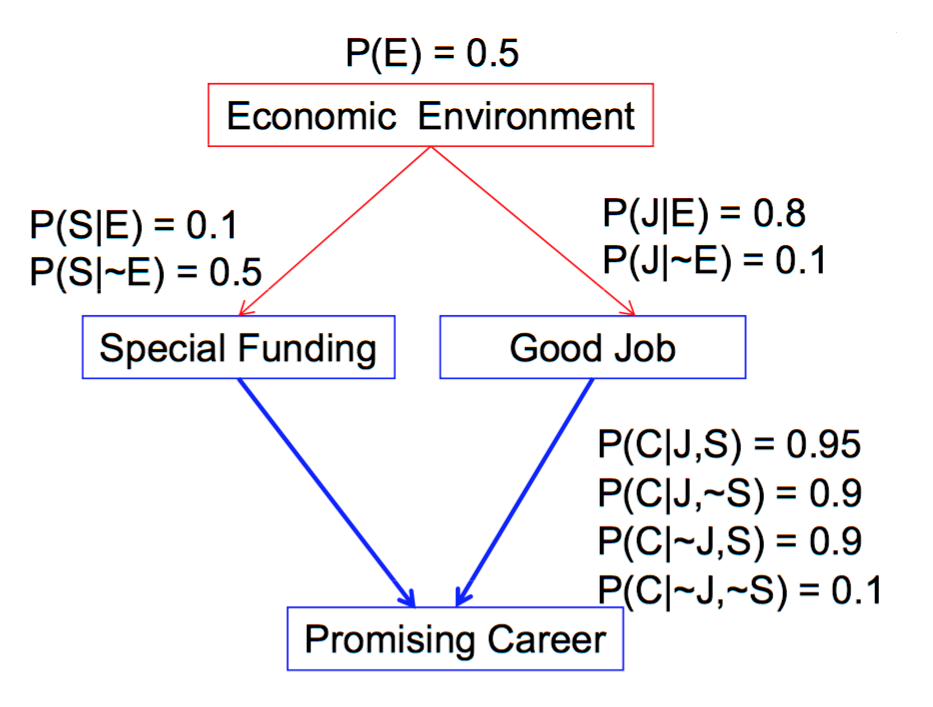   


# Defining Network

In [64]:
nodes = {'EconomicEnvironment':{'name':'EconomicEnvironment','start':True,'end':False,'parents':[],'children':['SpecialFunding','GoodJob'],'P':[0.5,0.5]},
         'SpecialFunding':{'name':'SpecialFunding','start':False,'end':False,'parents':['EconomicEnvironment'],'children':['PromisingCareer'],'P':[0.5,0.1]},
         'GoodJob':{'name':'GoodJob','start':False,'end':False,'parents':['EconomicEnvironment'],'children':['PromisingCareer'],'P':[0.1,0.8]},
         'PromisingCareer':{'name':'OnTime','start':False,'end':True,'parents':['SpecialFunding','GoodJob'],'children':[],'P':[0.1,0.9,0.9,0.95]},
         }

# Computing all Probabilities

In [65]:
ending_nodes = []
for k in nodes.keys():
  if nodes[k]['end']:
    ending_nodes.append(nodes[k])
ending_nodes

[{'P': [0.1, 0.9, 0.9, 0.95],
  'children': [],
  'end': True,
  'name': 'OnTime',
  'parents': ['SpecialFunding', 'GoodJob'],
  'start': False}]

In [66]:
def find_all_probs(given, memory, node):
  # checking memory
  if node['name'] in memory.keys():
    print(node['name'], memory[node['name']])
    return memory[node['name']]
  
  # check whether given
  if node['name'] in given.keys():
    if given[node['name']]:
      print(node['name'],(1,0))
      memory[node['name']] = (1,0)
      return (1,0)
    else:
      print(node['name'],(0,1))
      memory[node['name']] = (0,1)
      return (0,1)

  # check start
  if node['start']:
    print(node['name'],node['P'])
    memory[node['name']] = node['P']
    return node['P']
  
  # generating parent combinations for current node to be true
  prob_true = 0
  prob_false = 0
  for i in range(2**len(node['parents'])):
    combination_probability=1
    combination = '0'*int(len(node['parents'])-len(bin(i)[2:]))+bin(i)[2:]
    for pos in range(len(combination)):
      if combination[pos] == '1':
        print(node['parents'][pos],end=", ")
      else:
        print('not '+node['parents'][pos],end=", ")
    print()
    for pos in range(len(combination)):
      if combination[pos] == '1':
        combination_probability = combination_probability*find_all_probs(given, memory, nodes[node['parents'][pos]])[0]
      else:
        combination_probability = combination_probability*find_all_probs(given, memory, nodes[node['parents'][pos]])[1]
    prob_true += combination_probability*node['P'][i]
    prob_false += combination_probability*(1-node['P'][i])
  
  print(node['name'], (prob_true, prob_false))
  memory[node['name']] = (prob_true, prob_false)
  return (prob_true, prob_false)

In [68]:
given = {}
memory = {}
find_all_probs(given, memory, nodes['PromisingCareer'])

not SpecialFunding, not GoodJob, 
not EconomicEnvironment, 
EconomicEnvironment [0.5, 0.5]
EconomicEnvironment, 
EconomicEnvironment [0.5, 0.5]
SpecialFunding (0.3, 0.7)
not EconomicEnvironment, 
EconomicEnvironment [0.5, 0.5]
EconomicEnvironment, 
EconomicEnvironment [0.5, 0.5]
GoodJob (0.45, 0.55)
not SpecialFunding, GoodJob, 
SpecialFunding (0.3, 0.7)
GoodJob (0.45, 0.55)
SpecialFunding, not GoodJob, 
SpecialFunding (0.3, 0.7)
GoodJob (0.45, 0.55)
SpecialFunding, GoodJob, 
SpecialFunding (0.3, 0.7)
GoodJob (0.45, 0.55)
OnTime (0.5987500000000001, 0.40125000000000005)


(0.5987500000000001, 0.40125000000000005)

# 1.Probability of ~EcoEnv GoodJob SpecialFunding ~PromisingCareer

In [ ]:
query({},nodes['EconomicEnvironment'])[1] * query({'EconomicEnvironment':False},nodes['GoodJob'])[0] * query({'EconomicEnvironment':False},nodes['SpecialFunding'])[0] * query({'SpecialFunding':False,'GoodJob':False},nodes['PromisingCareer'])[1]

EconomicEnvironment [0.5, 0.5]
not EconomicEnvironment, 
EconomicEnvironment (0, 1)
EconomicEnvironment, 
EconomicEnvironment (0, 1)
GoodJob (0.1, 0.9)
not EconomicEnvironment, 
EconomicEnvironment (0, 1)
EconomicEnvironment, 
EconomicEnvironment (0, 1)
SpecialFunding (0.5, 0.5)
not SpecialFunding, not GoodJob, 
SpecialFunding (0, 1)
GoodJob (0, 1)
not SpecialFunding, GoodJob, 
SpecialFunding (0, 1)
GoodJob (0, 1)
SpecialFunding, not GoodJob, 
SpecialFunding (0, 1)
GoodJob (0, 1)
SpecialFunding, GoodJob, 
SpecialFunding (0, 1)
GoodJob (0, 1)
OnTime (0.1, 0.9)


0.022500000000000003

# 2.Probability of EcoEnv ~GoodJob PromisingCareer

In [ ]:
q1 = query({},nodes['EconomicEnvironment'])[0] * query({'SpecialFunding':True,'GoodJob':False},nodes['PromisingCareer'])[0] * query({'EconomicEnvironment':True},nodes['SpecialFunding'])[0] * query({'EconomicEnvironment':True},nodes['GoodJob'])[1]
q2 = query({},nodes['EconomicEnvironment'])[0] * query({'SpecialFunding':False,'GoodJob':False},nodes['PromisingCareer'])[0] * query({'EconomicEnvironment':True},nodes['SpecialFunding'])[1] * query({'EconomicEnvironment':True},nodes['GoodJob'])[1]
q1+q2

EconomicEnvironment [0.5, 0.5]
not SpecialFunding, not GoodJob, 
SpecialFunding (1, 0)
GoodJob (0, 1)
not SpecialFunding, GoodJob, 
SpecialFunding (1, 0)
GoodJob (0, 1)
SpecialFunding, not GoodJob, 
SpecialFunding (1, 0)
GoodJob (0, 1)
SpecialFunding, GoodJob, 
SpecialFunding (1, 0)
GoodJob (0, 1)
OnTime (0.9, 0.09999999999999998)
not EconomicEnvironment, 
EconomicEnvironment (1, 0)
EconomicEnvironment, 
EconomicEnvironment (1, 0)
SpecialFunding (0.1, 0.9)
not EconomicEnvironment, 
EconomicEnvironment (1, 0)
EconomicEnvironment, 
EconomicEnvironment (1, 0)
GoodJob (0.8, 0.19999999999999996)
EconomicEnvironment [0.5, 0.5]
not SpecialFunding, not GoodJob, 
SpecialFunding (0, 1)
GoodJob (0, 1)
not SpecialFunding, GoodJob, 
SpecialFunding (0, 1)
GoodJob (0, 1)
SpecialFunding, not GoodJob, 
SpecialFunding (0, 1)
GoodJob (0, 1)
SpecialFunding, GoodJob, 
SpecialFunding (0, 1)
GoodJob (0, 1)
OnTime (0.1, 0.9)
not EconomicEnvironment, 
EconomicEnvironment (1, 0)
EconomicEnvironment, 
EconomicEn

0.018

# 3.Probability of ~Promising Career 

In [67]:
q1 = query({'SpecialFunding':True,'GoodJob':True},nodes['PromisingCareer'])[1] * query({'EconomicEnvironment':True},nodes['SpecialFunding'])[0] * query({'EconomicEnvironment':True},nodes['GoodJob'])[0] * query({},nodes['EconomicEnvironment'])[0] + query({'SpecialFunding':True,'GoodJob':True},nodes['PromisingCareer'])[1] * query({'EconomicEnvironment':False},nodes['SpecialFunding'])[0] * query({'EconomicEnvironment':False},nodes['GoodJob'])[0] * query({},nodes['EconomicEnvironment'])[1]
q2 = query({'SpecialFunding':False,'GoodJob':False},nodes['PromisingCareer'])[1] * query({'EconomicEnvironment':True},nodes['SpecialFunding'])[1] * query({'EconomicEnvironment':True},nodes['GoodJob'])[1] * query({},nodes['EconomicEnvironment'])[0] + query({'SpecialFunding':False,'GoodJob':False},nodes['PromisingCareer'])[1] * query({'EconomicEnvironment':False},nodes['SpecialFunding'])[1] * query({'EconomicEnvironment':False},nodes['GoodJob'])[1] * query({},nodes['EconomicEnvironment'])[1]
q3 = query({'SpecialFunding':False,'GoodJob':True},nodes['PromisingCareer'])[1] * query({'EconomicEnvironment':True},nodes['SpecialFunding'])[1] * query({'EconomicEnvironment':True},nodes['GoodJob'])[0] * query({},nodes['EconomicEnvironment'])[0] + query({'SpecialFunding':False,'GoodJob':True},nodes['PromisingCareer'])[1] * query({'EconomicEnvironment':False},nodes['SpecialFunding'])[1] * query({'EconomicEnvironment':False},nodes['GoodJob'])[0] * query({},nodes['EconomicEnvironment'])[1]
q4 = query({'SpecialFunding':True,'GoodJob':False},nodes['PromisingCareer'])[1] * query({'EconomicEnvironment':True},nodes['SpecialFunding'])[0] * query({'EconomicEnvironment':True},nodes['GoodJob'])[1] * query({},nodes['EconomicEnvironment'])[0] + query({'SpecialFunding':True,'GoodJob':False},nodes['PromisingCareer'])[1] * query({'EconomicEnvironment':False},nodes['SpecialFunding'])[0] * query({'EconomicEnvironment':False},nodes['GoodJob'])[1] * query({},nodes['EconomicEnvironment'])[1]
q1+q2+q3+q4

not SpecialFunding, not GoodJob, 
SpecialFunding (1, 0)
GoodJob (1, 0)
not SpecialFunding, GoodJob, 
SpecialFunding (1, 0)
GoodJob (1, 0)
SpecialFunding, not GoodJob, 
SpecialFunding (1, 0)
GoodJob (1, 0)
SpecialFunding, GoodJob, 
SpecialFunding (1, 0)
GoodJob (1, 0)
OnTime (0.95, 0.050000000000000044)
not EconomicEnvironment, 
EconomicEnvironment (1, 0)
EconomicEnvironment, 
EconomicEnvironment (1, 0)
SpecialFunding (0.1, 0.9)
not EconomicEnvironment, 
EconomicEnvironment (1, 0)
EconomicEnvironment, 
EconomicEnvironment (1, 0)
GoodJob (0.8, 0.19999999999999996)
EconomicEnvironment [0.5, 0.5]
not SpecialFunding, not GoodJob, 
SpecialFunding (1, 0)
GoodJob (1, 0)
not SpecialFunding, GoodJob, 
SpecialFunding (1, 0)
GoodJob (1, 0)
SpecialFunding, not GoodJob, 
SpecialFunding (1, 0)
GoodJob (1, 0)
SpecialFunding, GoodJob, 
SpecialFunding (1, 0)
GoodJob (1, 0)
OnTime (0.95, 0.050000000000000044)
not EconomicEnvironment, 
EconomicEnvironment (0, 1)
EconomicEnvironment, 
EconomicEnvironment (

0.34874999999999995

# 4.Probability of EcoEnv ~GoodJob SpecialFunding PromisingCareer

In [69]:
query({'SpecialFunding':True,'GoodJob':False},nodes['PromisingCareer'])[0] * query({'EconomicEnvironment':True},nodes['SpecialFunding'])[0] * query({'EconomicEnvironment':True},nodes['GoodJob'])[1] * query({},nodes['EconomicEnvironment'])[0]

not SpecialFunding, not GoodJob, 
SpecialFunding (1, 0)
GoodJob (0, 1)
not SpecialFunding, GoodJob, 
SpecialFunding (1, 0)
GoodJob (0, 1)
SpecialFunding, not GoodJob, 
SpecialFunding (1, 0)
GoodJob (0, 1)
SpecialFunding, GoodJob, 
SpecialFunding (1, 0)
GoodJob (0, 1)
OnTime (0.9, 0.09999999999999998)
not EconomicEnvironment, 
EconomicEnvironment (1, 0)
EconomicEnvironment, 
EconomicEnvironment (1, 0)
SpecialFunding (0.1, 0.9)
not EconomicEnvironment, 
EconomicEnvironment (1, 0)
EconomicEnvironment, 
EconomicEnvironment (1, 0)
GoodJob (0.8, 0.19999999999999996)
EconomicEnvironment [0.5, 0.5]


0.009

# 5.Probability of ~EcoEnv ~GoodJob ~SpecialFunding ~PromisingCareer

In [70]:
query({'SpecialFunding':False,'GoodJob':False},nodes['PromisingCareer'])[1] * query({'EconomicEnvironment':False},nodes['SpecialFunding'])[1] * query({'EconomicEnvironment':False},nodes['GoodJob'])[1] * query({},nodes['EconomicEnvironment'])[1]

not SpecialFunding, not GoodJob, 
SpecialFunding (0, 1)
GoodJob (0, 1)
not SpecialFunding, GoodJob, 
SpecialFunding (0, 1)
GoodJob (0, 1)
SpecialFunding, not GoodJob, 
SpecialFunding (0, 1)
GoodJob (0, 1)
SpecialFunding, GoodJob, 
SpecialFunding (0, 1)
GoodJob (0, 1)
OnTime (0.1, 0.9)
not EconomicEnvironment, 
EconomicEnvironment (0, 1)
EconomicEnvironment, 
EconomicEnvironment (0, 1)
SpecialFunding (0.5, 0.5)
not EconomicEnvironment, 
EconomicEnvironment (0, 1)
EconomicEnvironment, 
EconomicEnvironment (0, 1)
GoodJob (0.1, 0.9)
EconomicEnvironment [0.5, 0.5]


0.2025